<a href="https://colab.research.google.com/github/mitesh98/StackOverflow-Tag-Prediction/blob/master/StackOverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StackOverflow : Tag Prediction

# 1. Buisness Problem

# 1.1 Description

**Description**

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.

Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

**Problem Statemtent**

Suggest the tags based on the content that was there in the question posted on Stackoverflow.

**Source:** https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

# 1.2 Source / useful links
Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 

Youtube : https://youtu.be/nNDqbUhtIRg 

Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf 

Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

# 1.3 Real World / Business Objectives and Constraints






1. Predict as many tags as possible with high precision and recall.

2. Incorrect tags could impact customer experience on StackOverflow.

3. No strict latency constraints.

# 2. Machine Learning problem

# 2.1 Data
**2.1.1 Data Overview**

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 
All of the data is in 2 files: Train and Test.

Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Size of Test.csv - 2GB

Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).


**Note :-** Due to my PC constraints having 4 GB of RAM only i randomly sampled 100k rows from Train.csv and saved as Train_data.csv and i will be using the same.

**Data Field Explaination**

Dataset contains 100k rows. The columns in the table are:

Id - Unique identifier for each question

Title - The question's title

Body - The body of the question

Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')



# 2.2 Mapping the real-world problem to a Machine Learning Problem

# 2.2.1 Type of Machine Learning Problem

It is a multi-label classification problem 
Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. 
Credit: http://scikit-learn.org/stable/modules/multiclass.html


**2.2.2 Performance metric**

**Micro-Averaged F1-Score (Mean F Score) :**   The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 (precision recall) / (precision + recall)

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. 

**'Micro f1 score': **

Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance. 

**'Macro f1 score': **

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 

https://www.kaggle.com/wiki/MeanFScore 
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

**Hamming loss :**  The Hamming loss is the fraction of labels that are incorrectly predicted. 
https://www.kaggle.com/wiki/HammingLoss 

# 3. Exploratory Data Analysis

# 3.1 Data Loading 



In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/StackOverflow/Train_data.csv" "Train_data.csv"

In [0]:
import pandas as pd

In [0]:
data=pd.read_csv("Train_data.csv")

In [73]:
data.head()

,Unnamed: 0,Id,Title,Body,Tags
0,2221128,2221129,Linearization for differential equation,<p>I'm trying to make linearization for the fo...,differential-equations
1,1757257,1757258,Java upload file (image specifically) from a J...,<p>I am going mad trying to find an example of...,java asp.net-mvc file-upload applet jnlp
2,1497316,1497317,how to set separate css to each menu item in t...,<p>i have a menu control like below</p>\n\n<p>...,c# asp.net
3,3055821,3055822,jQuery multiple event handler,<p>What does the keyup() at the end of it mean...,jquery
4,4281363,4281364,Applications for using couchDB and a RDBMS tog...,<p>Wondering if there was a scenario where one...,database architecture couchdb rdbms


****3.1.1 Using Pandas with SQLite to Load the data****

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine

In [0]:
#Creating db file from csv
if not os.path.isfile('Train_data.db'):
  engine= sqlalchemy.create_engine('sqlite:///Train_data.db')
  start=datetime.now()
  Csize=10000
  j=0
  index_start=1
  for df in pd.read_csv('Train_data.csv',names=['Id','Title','Body','Tags'], chunksize = Csize,iterator=True,encoding='utf-8'):
    df.index+=index_start
    j+=1
    print('{} rows'.format(j*Csize))
    df.to_sql('data',engine,if_exists='append')
    index_start=df.index[-1]+1
    print("Time taken :" ,datetime.now() - start)
  


**3.1.2 Counting the number of rows**

In [76]:
if os.path.isfile('Train_data.db'):
  con=sqlite3.connect('Train_data.db')
  n_rows=pd.read_sql(""" SELECT count(*) FROM `data`""",con)
  print("No of rows : ",n_rows['count(*)'].values[0])
  con.close()

No of rows :  100001


**3.1.3 Checking for duplicates**

In [0]:
con=sqlite3.connect('Train_data.db')
query="SELECT `Title`,`Tags`,`Body`, COUNT(*) as cnt_dup FROM `data` GROUP BY `Title`,`Body`,`Tags`"
dataframe=pd.read_sql(query,con)
con.close()


In [78]:
n_row=n_rows['count(*)'].values[0]
n_row_dup=dataframe.shape[0]
n_dup=n_row-n_row_dup
print(n_row)
print(n_row_dup)
print("No of Duplicates= ",n_dup)
print("% duplication = ",(n_dup/n_row)*100)

100001
99462
No of Duplicates=  539
% duplication =  0.5389946100538995


In [79]:
dataframe.cnt_dup.value_counts()

1    98923
2      539
Name: cnt_dup, dtype: int64

**Observation :** 

1.No of question one time= 98923

2.No of question two time= 539

In [80]:
#Adding tag_count in dataframe
dataframe['tag_count']=dataframe['Tags'].apply(lambda text : len(text.split(" ")))
dataframe.head()

,Title,Tags,Body,cnt_dup,tag_count
0,Advise on tackling syntax errors in Java,java,"<p>I very inexperience with Java, I'm spending...",1,1
1,Controlling the Lego WeDo Device,c# api lego,<p>Has anyone written a API for the Lego WeDo ...,1,3
2,Count inverse document frequency (idf) in eve...,php,"<p>I wanna count idf, the formula is <code>IDF...",1,1
3,"FrameView with ""flip"" animation images not sc...",android image layout resize scaling,<p>Can't seem to work out what I've got wrong....,1,5
4,Going from Java to Classic ASP / VB,vb6 career-development legacy-code,"<p>Right now, I work on a small team at a larg...",1,3


In [81]:
dataframe['tag_count'].value_counts()

3    28412
2    26520
4    19206
1    13682
5    11642
Name: tag_count, dtype: int64

**Observation :**

1.No of questios having 3 tags =28412

2.No of questios having 2 tags =26520

3.No of questios having 4 tags =19206

4.No of questios having 1 tags =13682

5.No of questios having 5 tags =11642

Order a/c to no of question :

3tags>2 tags > 4 tags >1 tag >5 tags


In [0]:
#Creatibng a new database with no duplicates
if not  os.path.isfile('database_final.db'):
  engine = create_engine("sqlite:///database_final.db")
  data_final = pd.DataFrame(dataframe,columns=['Title','Body','Tags'])
  data_final.to_sql('DTable',engine)

In [83]:
data_final.shape


(99462, 3)

In [0]:
con=sqlite3.connect('database_final.db')
query="SELECT Tags FROM Dtable "
tags=pd.read_sql(query,con)
con.close()

In [85]:
tags.head()

,Tags
0,java
1,c# api lego
2,php
3,android image layout resize scaling
4,vb6 career-development legacy-code


In [86]:
tags.Tags[0]

'java'

# 3.2 Analysis of Tags

**3.2.1 Total number of unique tags**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
vectorizer=CountVectorizer(tokenizer= lambda x: x.split() )
#by default 'split()' will tokenize each tag using space.

tag_train_bows=vectorizer.fit_transform(tags['Tags'])

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.

In [0]:
print("Number of data points :", tag_train_bows.shape[0])
print("Number of unique tag :", tag_train_bows.shape[1])

In [0]:
#Some features
features=vectorizer.get_feature_names()
print("Some Features are ")
for i in range(1,20):
  print(features[i])

**3.2.3 Number of times a tag appeared**

In [0]:
import csv

In [0]:
freqs = tag_train_bows.sum(axis=0).A1
#matrix.A1 Return self as a flattened ndarray.

result = dict(zip(features, freqs))

In [109]:
#Saving this dictionary to csv files.
#if not os.path.isfile('tag_counts_dict.csv'):
with open ('tag_counts_dict.csv','w') as csv_file:
  writer = csv.writer(csv_file)
  for key,value in result.items():
    print(key)
    writer.writerow([key,value])

      
  

.app
.bash-profile
.each
.emf
.exe
.htaccess
.htpasswd
.lib
.mov
.net
.net-1.1
.net-2.0
.net-3.5
.net-4.0
.net-4.5
.net-assembly
.net-cf-3.5
.net-client-profile
.net-framework
.net-micro-framework
.net-remoting
.net3.5
.netrc
.obj
.post
.profile
.wav
.x
1080p
10gbethernet
10gige
16-bit
16bit
1and1
2-way-object-databinding
2007
2010
2013
24hour
2d
2d-array
2d-games
2d-vector
2to3
3-tier
3.0
3.1
301
301-redirect
32-bit
32bit
32bit-64bit
35mm
389-ds
3com
3d
3d-engine
3d-modelling
3d-reconstruction
3d-vision
3des
3ds
3dsmax
3g
3g-network
3gp
3nf
3rd-party
3rd-party-controls
3rd-party-library
3ware
403
404
404-error
4clojure
500
500-error
502-error
503-error
504
50mm
64-bit
64bit
68000
7-zip
7zip
8-puzzle
802.11
802.11g
802.11n
802.1x
8085
8086
960.gs
a-record
a-star
aabb
aac
aapt
ab-testing
abaddressbook
abandonedmutexexception
abandonware
abap
abbreviation
abbyy
abc
abcpdf
abelian-groups
abi
abinitio
ableton-live
abort
abortion
abrecord
abrecordref
absolute
absolute-path
absolute-position

In [110]:
tag_df=pd.read_csv("tag_counts_dict.csv",names=['Tags','Counts'])
tag_df.head(10)

,Tags,Counts
0,.app,1
1,.bash-profile,5
2,.each,2
3,.emf,3
4,.exe,1
5,.htaccess,336
6,.htpasswd,2
7,.lib,1
8,.mov,1
9,.net,2676


In [114]:
tag_df_sorted=tag_df.sort_values(['Counts'],ascending=False)
tag_counts=tag_df_sorted['Counts'].values
#DataFrame.values : Return a Numpy representation of the DataFrame.

tag_counts

array([7663, 6877, 6448, ...,    1,    1,    1])

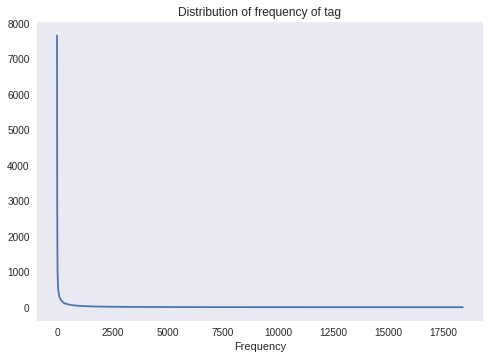

In [116]:
plt.plot(tag_counts)
plt.grid()
plt.xlabel('Tag number')
plt.xlabel('Frequency')
plt.title("Distribution of frequency of tag")
plt.show()

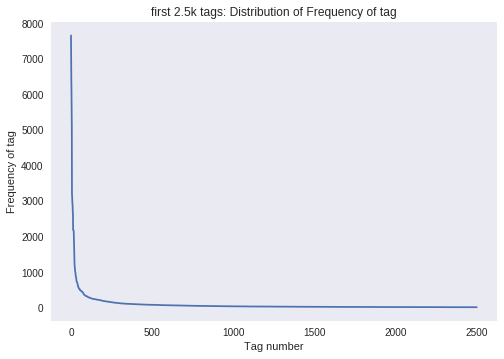

In [117]:
plt.plot(tag_counts[0:2500])
plt.title('first 2.5k tags: Distribution of Frequency of tag')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Frequency of tag")
plt.show()


In [118]:
print(len(tag_counts[0:2500:10]),tag_counts[0:2500:10])

250 [7663 2879 1597  868  667  528  482  444  370  334  316  289  272  255
  246  239  227  220  213  201  190  181  174  169  161  153  148  141
  136  131  126  122  117  114  111  109  107  105  103  101   98   97
   94   92   90   88   87   85   83   82   81   80   79   78   77   75
   74   72   70   70   69   68   66   65   64   64   63   62   61   60
   60   59   57   57   55   55   54   53   52   51   51   50   49   49
   49   48   47   47   46   45   44   44   43   42   42   42   41   40
   40   39   39   38   38   38   37   37   36   36   36   35   35   35
   35   34   34   34   33   33   33   33   33   32   32   32   31   31
   31   30   30   30   30   29   29   29   29   28   28   28   28   27
   27   27   27   27   26   26   26   26   26   25   25   25   25   25
   25   24   24   24   24   24   23   23   23   23   23   23   23   22
   22   22   22   22   22   22   21   21   21   21   21   21   21   21
   20   20   20   20   20   20   20   19   19   19   19   19   19   19
  

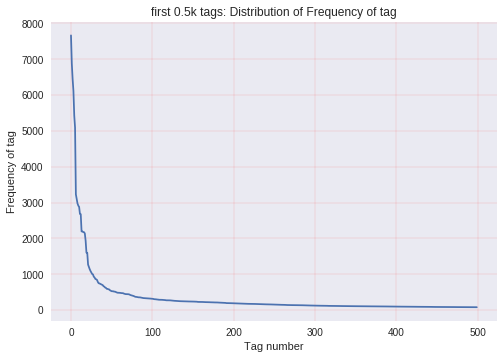

In [123]:
plt.plot(tag_counts[0:500])
plt.title('first 0.5k tags: Distribution of Frequency of tag')
plt.xlabel("Tag number")
plt.ylabel("Frequency of tag")
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()

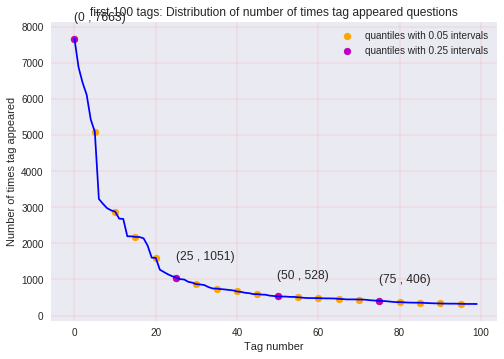

20 [7663 5091 2879 2177 1597 1051  868  744  667  592  528  506  482  461
  444  406  370  355  334  325]


In [124]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [0]:
#Store tags whose frequency is greater than 1000
list_of_tags_gt_1k=[]
for i in range(tag_df.shape[0]):
  if(tag_df.iloc[i].Counts >1000):
    list_of_tags_gt_1k.append(tag_df.iloc[i].Tags)

In [134]:
len(list_of_tags_gt_1k)

27

In [136]:
print("tag = ",list_of_tags_gt_1k[0]," has max Frequency= ",tag_counts[0])

tag =  .net  has max Frequency=  7663


**Observation:**
1. tag '.net ' has max frequency 7663
2. 27 tag is tagged in more than 1000 question.
3. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

**3.2.4 Tags Per Question**

In [0]:
#Storing tag_counts in a list
tag_cnt_que=tag_train_bows.sum(axis=1).tolist()

## 'tag_count_que' is list of list 
tag_count_que=[]
for li in tag_cnt_que:
  for x in li:
    tag_count_que.append(int(x))

In [147]:
print( "Maximum number of tags per question: %d"%max(tag_count_que))
print( "Minimum number of tags per question: %d"%min(tag_count_que))
print( "Avg. number of tags per question: %f"% ((sum(tag_count_que)*1.0)/len(tag_count_que)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.885444


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


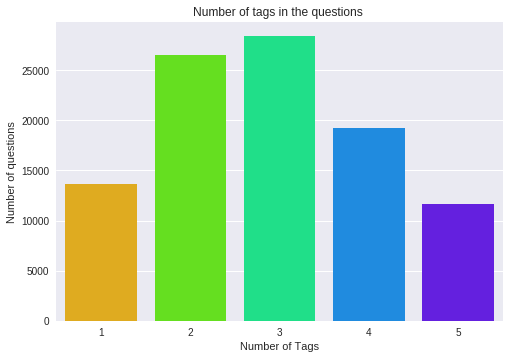

In [151]:
sns.countplot(tag_count_que,palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

#Note:- 'countplot' is used to plot categorical data
#Note:- palette='gist_rainbow' result in very good color effect